# TensorFlow Tutorial with MNIST Dataset
**About the MNIST dataset**.   
MNIST is the equivalent *Hello World* of image analysis.
It consists of hand written numbers, 0-9, in 28x28 pixel squares.  
Each gray-scale pixel contains an integer 0-255 to indicate darkness, with 0 white and 255 black.  
There are about 60,000 training records, and about 10,000 test records.  
In other words, the images of numbers have already been transformed into arrays of ints to make them easier to use for ML projects. You can find more info on the dataset [here](http://yann.lecun.com/exdb/mnist/). You can also download it from [here](https://s3.amazonaws.com/img-datasets/mnist.pkl.gz).
## 1. Load Data into a Numpy Array  
I downloaded the data file onto my desktop and loaded it locally.  
You can also load it directly from the cloud as follows:  
```mnist = tf.keras.datasets.mnist  
(x_train, y_train), (x_test, y_test) = mnist.load_data()  
```  
**After the load:**   
x_train contains 60k arrays of 28x28.  
The y_train vector contains the corresponding labels for these.  
x_test contains 10k arrays of 28x28.  
The y_test vector contains the corresponding labels for these.

In [218]:
import pickle
import numpy as np

with open('/Users/joejames/desktop/mnist.pkl', 'rb') as f:
    (x_train, y_train), (x_test, y_test) = pickle.load(f, encoding='latin1')
    
print(type(x_train), x_train.size, x_train.shape)
print(type(y_train), y_train.size, y_train.shape)
print(type(x_test), x_test.size, x_test.shape)
print(type(y_test), y_test.size, y_test.shape)
print(y_train[55], y_test[583])

<class 'numpy.ndarray'> 47040000 (60000, 28, 28)
<class 'numpy.ndarray'> 60000 (60000,)
<class 'numpy.ndarray'> 7840000 (10000, 28, 28)
<class 'numpy.ndarray'> 10000 (10000,)
8 2


## 2. Use Matplotlib to visualize one record.  
I set the colormap to Greys. There are a bunch of other colormap choices if you like bright visualizations. Try magma or any of the other colormap choice in the [docs](https://matplotlib.org/tutorials/colors/colormaps.html).

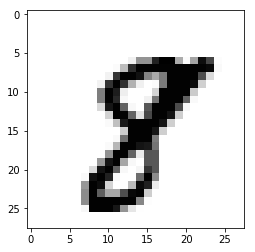

In [217]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.imshow(x_train[55].reshape(28, 28), cmap=cm.Greys)

## 3. Plot a bunch of records to see sample data  
Basically, use the same Matplotlib commands above in a for loop to show 18 records from the train set in a subplot figure. We also make the figsize a bit bigger and remove the tick marks for readability.

<function matplotlib.pyplot.show(*args, **kw)>

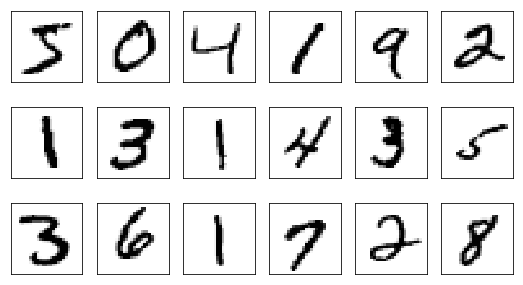

In [213]:
images = x_train[0:18]
fig, axes = plt.subplots(3, 6, figsize=[9,5])

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap=cm.Greys)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show

## 4. Show distribution of training data labels   
The training data is about evenly distributed across all nine digits. 

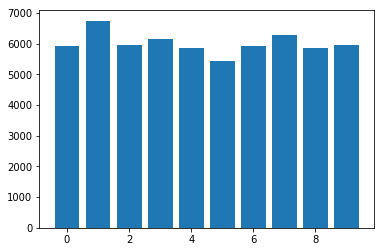

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [214]:
counts = np.bincount(y_train)
nums = np.arange(len(counts))
plt.bar(nums, counts)
plt.show()
print(counts)

## 5. Apply Keras/TensorFlow neural network  
Use tensorflow to train the model with 60k training records, compile the model, and classify 10k test records with 98% accuracy.  
**Create the model**  
Build the keras model by stacking layers into the network. Our model here has four layers:
- Flatten reshapes the data into a 1-dimensional array
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) tells the model to use output arrays of shape (*, 512) and sets rectified linear [activation function](https://keras.io/activations/). 
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies dropout to the input to help avoid overfitting.
- The next Dense line condenses the ouput into probabilities for each of the 10 digits.

**Compile the model**   
- [Adam](https://keras.io/optimizers/) is an optimization algorithm that uses stochastic gradient descent to update network weights.
- Sparse categorical crossentropy is a [loss function](https://keras.io/losses/) that is required to compile the model. The loss function measures how accurate the model is during training. We want to minimize this function to steer the model in the right direction.
- A metric is a function that is used to judge the performance of your model. We're using accuracy of our predictions as compared to y_test as our metric.  
Lastly, we fit our training data into the model, with several training repetitions (epochs), then evaluate our test data. 

Our final result is about 98% accuracy in classifying 10k digits in the test set. You can try tweaking this model with different settings to get a better score. An easy tweak is increasing the epochs, which improves accuracy at the expense of time. Follow the links to the Keras layer docs above and try different options for Dense output, activation functions, optimization algorithms and loss functions.

In [215]:
import tensorflow as tf
# Disable some deprecated error messages
tf.logging.set_verbosity(tf.logging.ERROR)

# Normalize the data to a 0.0 to 1.0 scale for faster processing
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4)
model.evaluate(x_test, y_test)

Epoch 1/4
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2581 - acc: 0.9244
Epoch 2/4
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1180 - acc: 0.9644
Epoch 3/4
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0867 - acc: 0.9736
Epoch 4/4
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0662 - acc: 0.9791


[0.0662360069771763, 0.9791]

## 6. Generate predictions for test set  
Our predictions are in the form of a list of 10 floats, with probabilities for each value. We can get the prediction by picking the index of the list item with the highest probability. And we can visualize that item to verify our prediction.

[5.5930052e-09 1.6970777e-15 2.4897268e-10 2.3935108e-14 7.2053798e-09
 4.4642620e-10 1.0000000e+00 8.1785776e-12 2.4993282e-10 2.6947859e-13]
6


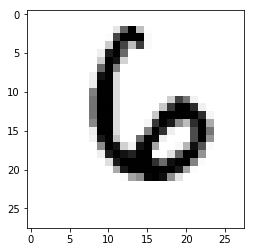

In [216]:
predictions = model.predict(x_test)
print(predictions[88])
print(np.argmax(predictions[88]))
plt.imshow(x_test[88].reshape(28, 28), cmap=cm.Greys)